In [1]:
%load_ext lab_black
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

plt.style.use("seaborn")
plt.style.use("seaborn-poster")

# Custom module imports
from src import df_cleaner
from src import plot_functions as pf
from src import plots

In [3]:
df = pd.read_csv("abalone.csv")
df = df_cleaner.snake_case(df)
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Investigating distributions of each feature

In [4]:
features = df.columns
target = "rings"
features = features.drop(target)

## 1. Sex

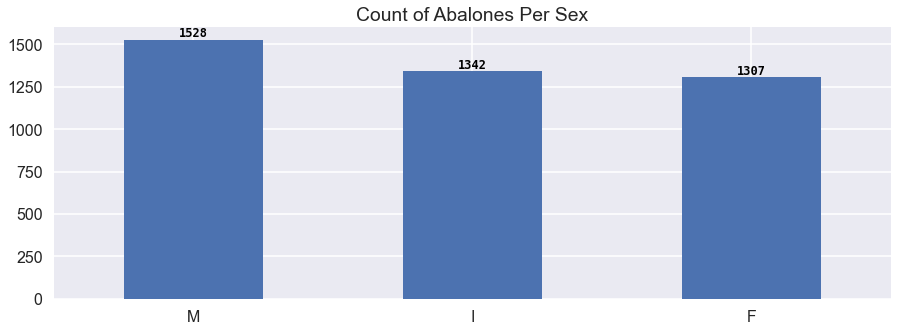

In [5]:
fig = plt.figure(figsize=[15, 5])
ax = plt.axes()
df["sex"].value_counts().plot.bar()
pf.show_values_on_bars(ax)
plt.xticks(rotation=0)
plt.title("Count of Abalones Per Sex")
pf.save_figure(file_name="Count Per Sex", subfolder_name="01.1 Basic EDA")

### Does sex of "I" mean Infant?

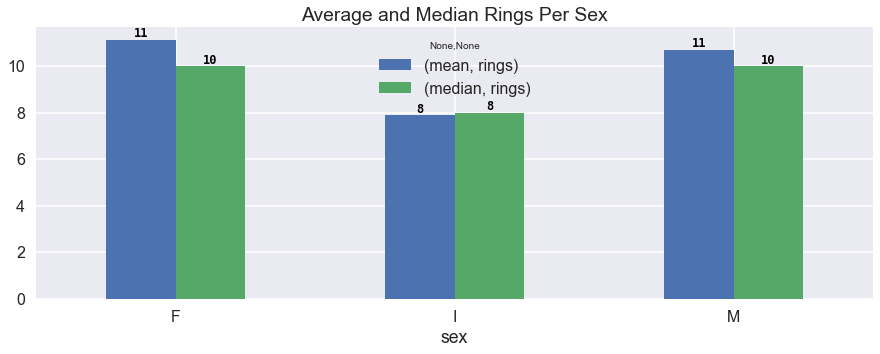

In [6]:
fig = plt.figure(figsize=[15, 5])
ax = plt.axes()
pd.pivot_table(
    data=df[["sex", "rings"]], index="sex", aggfunc=["mean", "median"]
).plot.bar(ax=ax)

pf.show_values_on_bars(ax)
plt.xticks(rotation=0)
plt.title("Average and Median Rings Per Sex")
pf.save_figure(
    file_name="Mean and Median Rings Per Sex", subfolder_name="01.1 Basic EDA"
)

## 2. Length

/Users/ellierossi/.local/share/virtualenvs/MachineLearning-Abalone-EuxtL1Oy/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


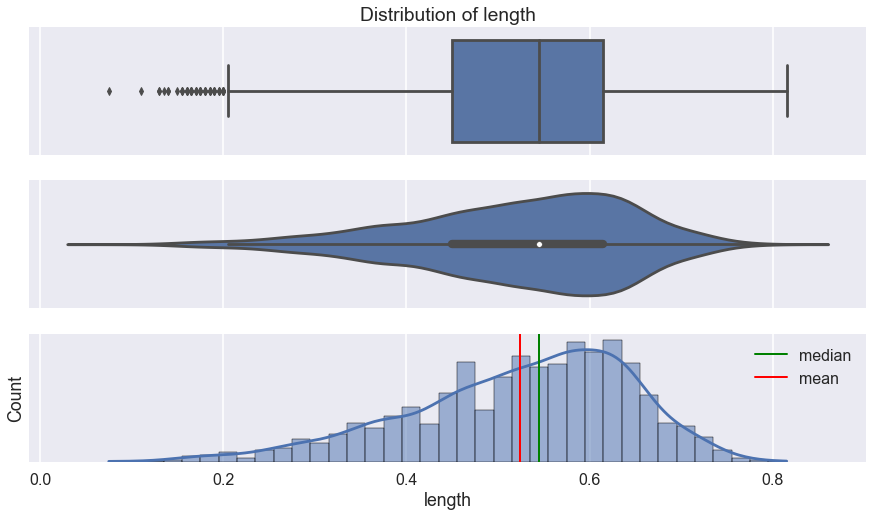

In [11]:
plots.distribution_plot(df, "length")

No handles with labels found to put in legend.


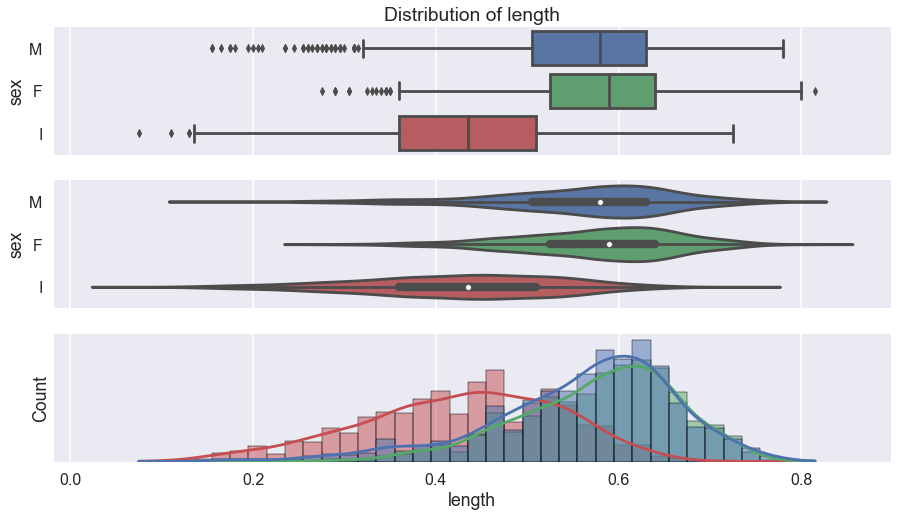

In [13]:
plots.distribution_plot(df, "length", hue="sex")

# Plot distribution of all numeric

In [14]:
numeric_columns = df.select_dtypes(include="number").columns

/Users/ellierossi/.local/share/virtualenvs/MachineLearning-Abalone-EuxtL1Oy/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/ellierossi/.local/share/virtualenvs/MachineLearning-Abalone-EuxtL1Oy/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/ellierossi/.local/share/virtualenvs/MachineLearning-Abalone-EuxtL1Oy/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid posit

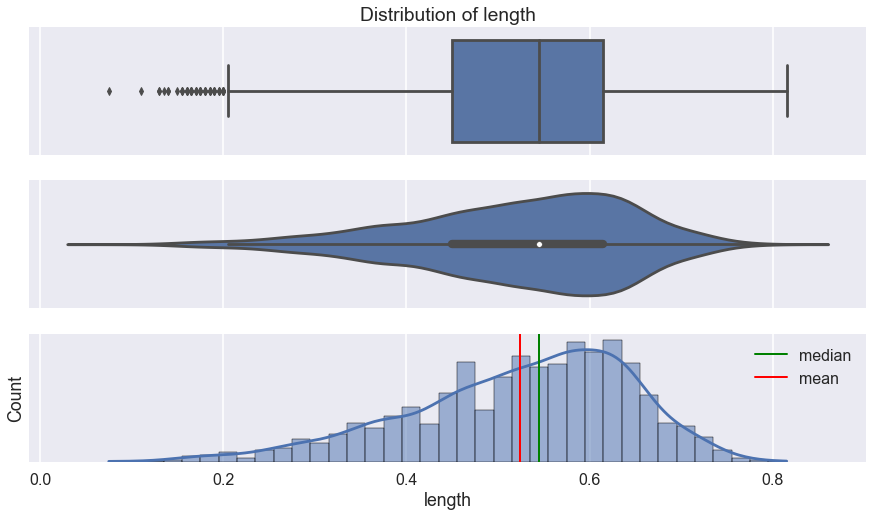

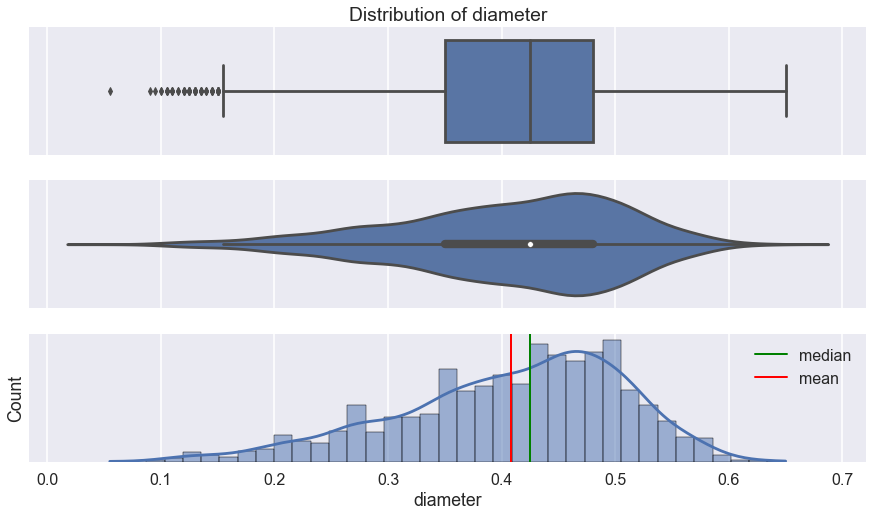

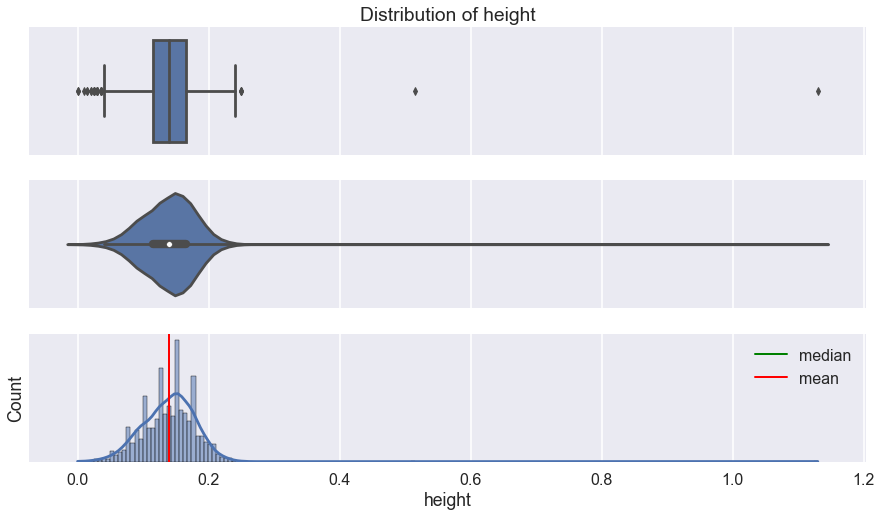

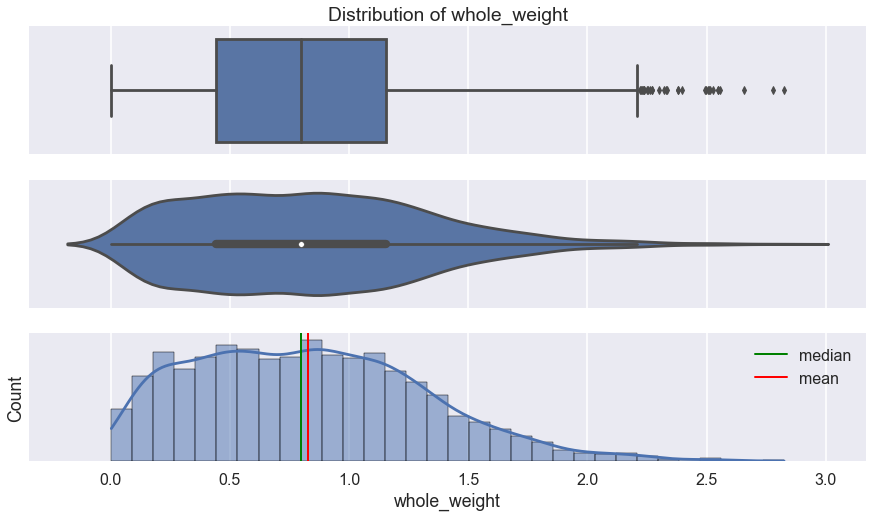

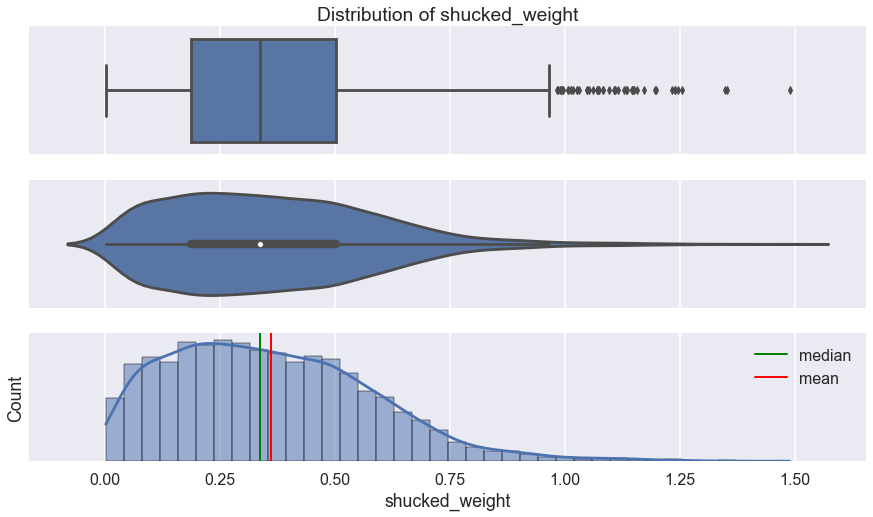

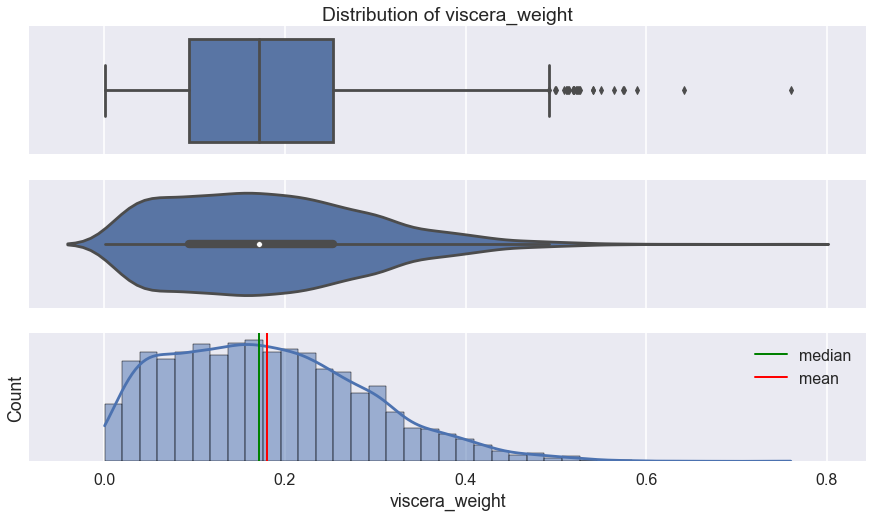

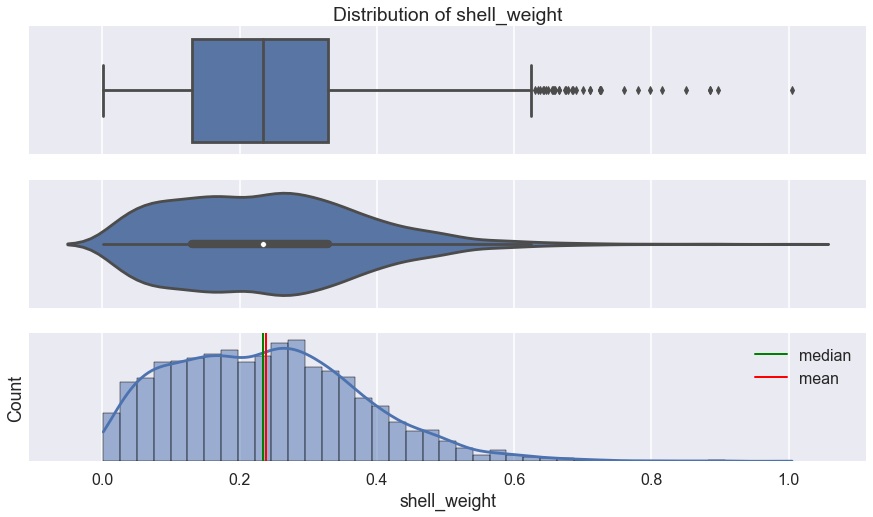

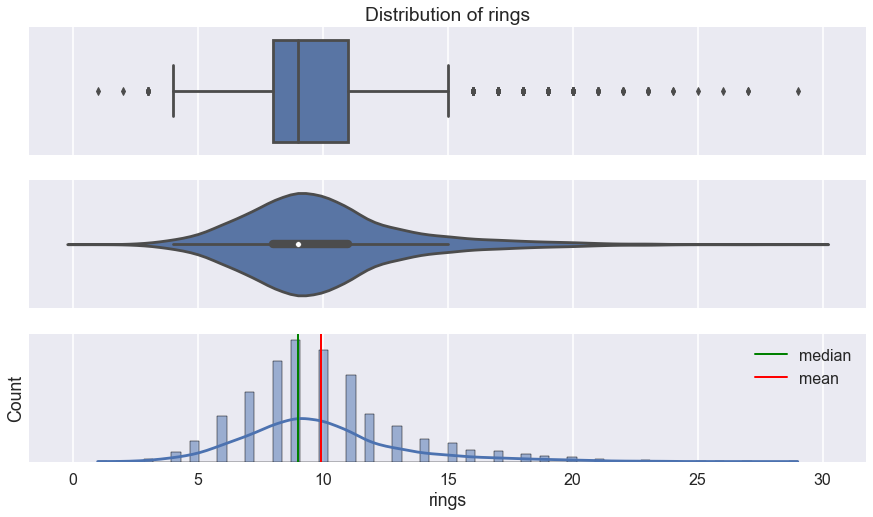

In [15]:
for col in numeric_columns:
    plots.distribution_plot(df, col)

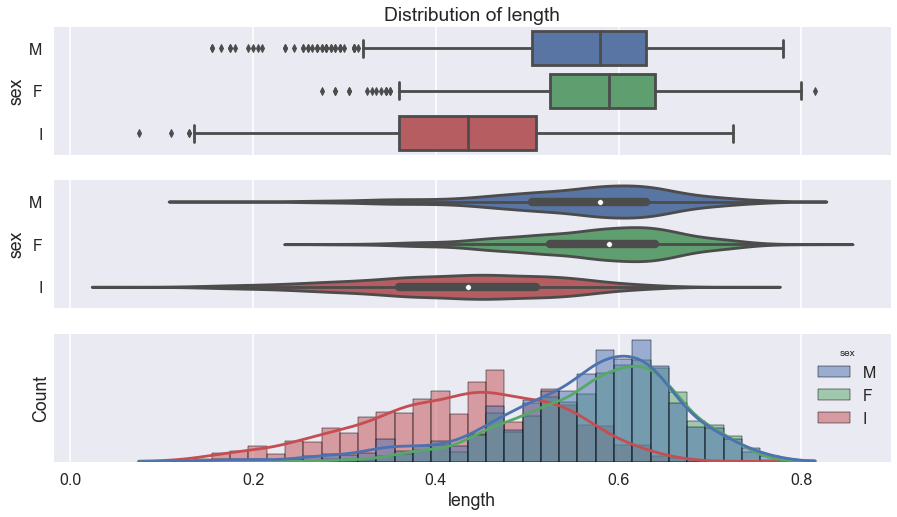

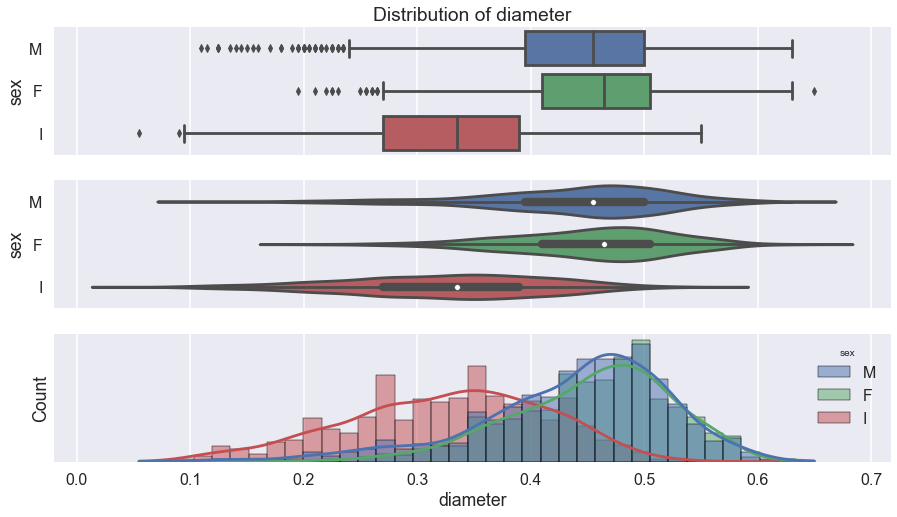

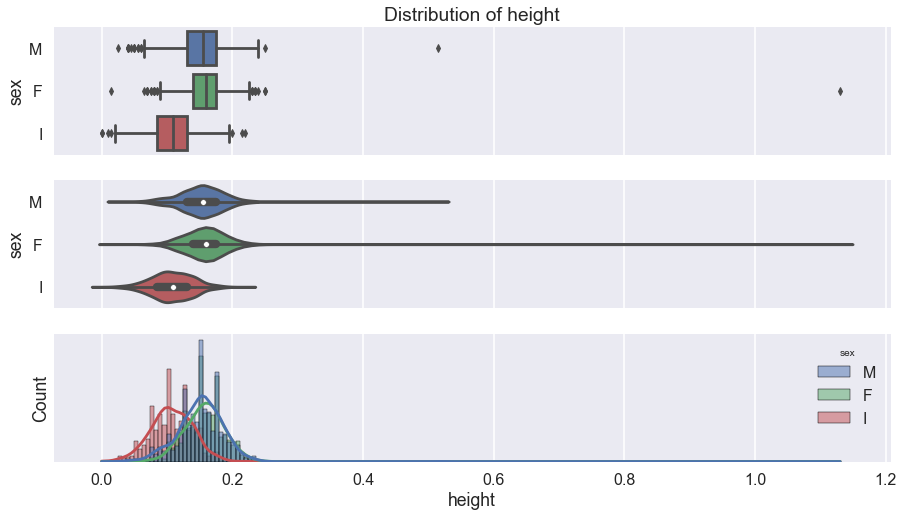

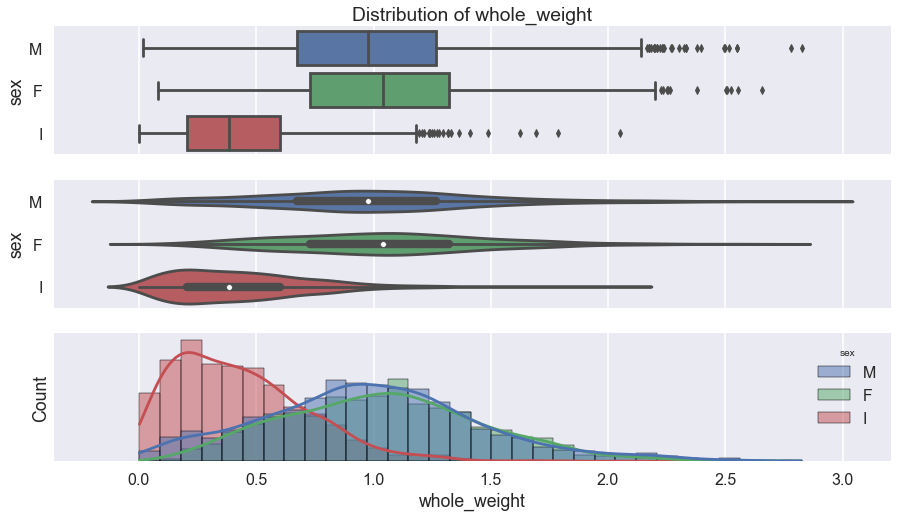

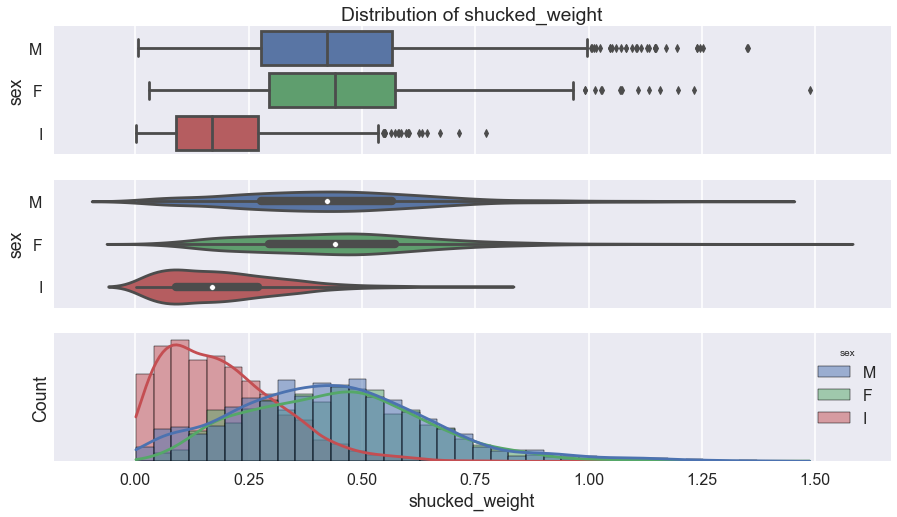

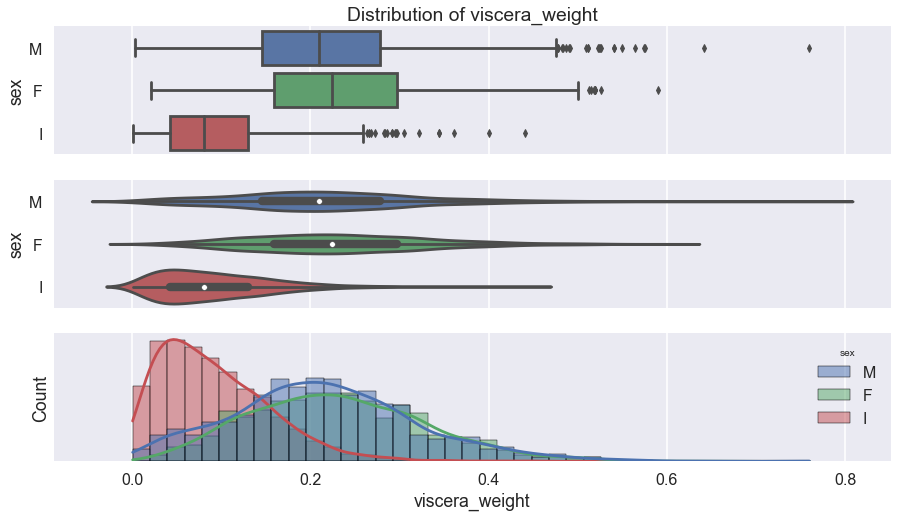

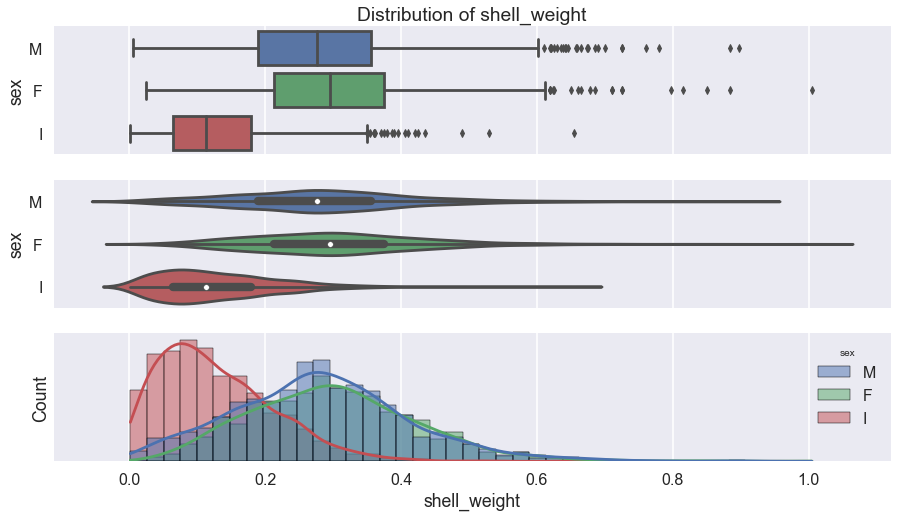

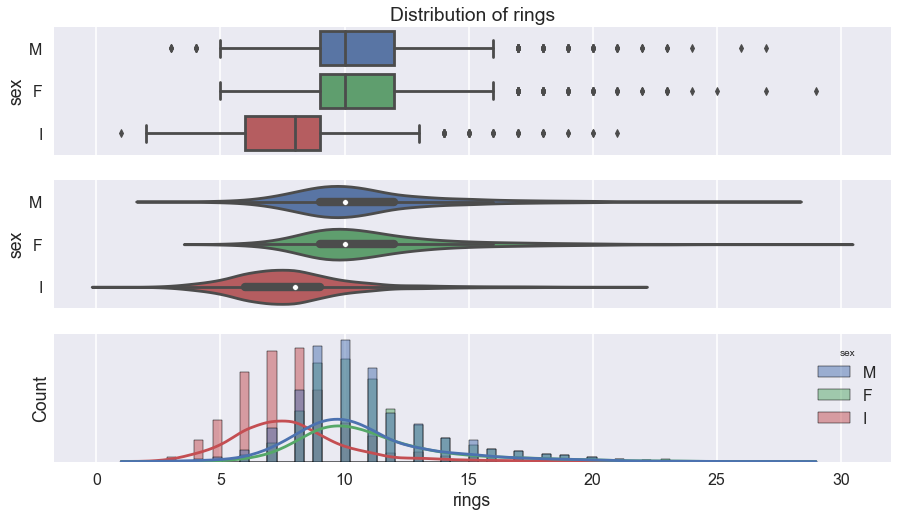

In [16]:
for col in numeric_columns:
    plots.distribution_plot(df, col, hue="sex")